# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
pip install palmerpenguins

In [48]:
# Code Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [49]:
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
3,NaN,NaN,NaN,NaN,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

ValueError: x and y must be the same size

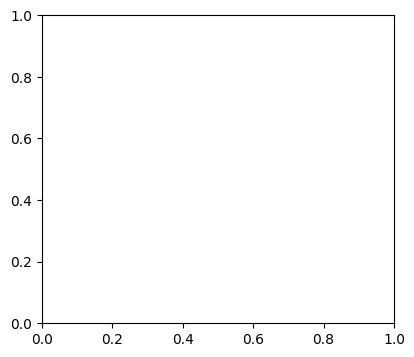

In [51]:
penguins = penguins.dropna()
X = penguins.drop(columns=['bill_depth_mm'])
y = penguins['bill_depth_mm'].values

# Define polynomial degrees to test
degrees = [1, 2, 3, 10]

# Prepare a range of values for plotting the fitted curves
x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# To store MSE values for training and testing
train_errors = []
test_errors = []

# Plot data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='black', alpha=0.5, label="Data")

# Split data into training and testing sets
np.random.seed(0)
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]

# Fit models and make predictions
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    x_plot_poly = poly_features.transform(x_plot)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Plot the model on the data plot
    y_plot = model.predict(x_plot_poly)
    plt.plot(x_plot, y_plot, label=f"Degree {degree}")

    # Calculate MSE for training and testing data
    train_mse = mean_squared_error(y_train, model.predict(X_train_poly))
    test_mse = mean_squared_error(y_test, model.predict(X_test_poly))

    # Store errors for plotting
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot settings for the data fit
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend()
plt.title("Polynomial Fits")

# Plot Mean Squared Error vs. Model Flexibility
plt.subplot(1, 2, 2)
plt.plot(degrees, train_errors, label="Training Error", marker='o')
plt.plot(degrees, test_errors, label="Testing Error", marker='s')
plt.xlabel("Model Flexibility (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Testing Error vs. Model Flexibility")

plt.tight_layout()
plt.show()


In [40]:
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
3,NaN,NaN,NaN,NaN,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,True,False,True,False,True
340,43.5,18.1,202.0,3400.0,2009,True,False,True,False,False
341,49.6,18.2,193.0,3775.0,2009,True,False,True,False,True
342,50.8,19.0,210.0,4100.0,2009,True,False,True,False,True
